# Zillow Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from wrangle_zillow import wrangle_zillow

import scipy.stats as stats
from scipy.stats import f_oneway

import warnings
warnings.filterwarnings("ignore")


sns.set(rc={'figure.figsize':(11.7,8.27)})

Create a python script or jupyter notebook named explore_zillow and do the following:
   

### 1. Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. 

<code style="background:yellow;color:black"><strong>Target Variable:</strong> logerror</code>

##### Continous vs. Categorical

Are the logerror averages significantly different from each...

- `county`(LA, Orange, Ventura)?
- `bedroomcnt`?
- `bathroomscnt`?
- `roomcnt`?
- `buildingqualitytypeid`?
- `heatingsystemdesc`?

##### Continous vs. Continous

Is there a linear relationship between `logerror` and...
- `structuretaxvaluedollarcnt`?
- `taxvaluedollarcnt`?
- `landtaxvaluedollarcnt`?
- `taxamount`?
- `calculatedfinishedsquarefeet`? 
- `lotsizesqurefeet`?
- `yearbuilt`?

In [2]:
train, validate, test = wrangle_zillow()

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29191 entries, 9169 to 8975
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      29191 non-null  int64  
 1   bathroomcnt                   29191 non-null  float64
 2   bedroomcnt                    29191 non-null  float64
 3   buildingqualitytypeid         29191 non-null  float64
 4   calculatedfinishedsquarefeet  29191 non-null  float64
 5   fullbathcnt                   29191 non-null  float64
 6   latitude                      29191 non-null  float64
 7   longitude                     29191 non-null  float64
 8   lotsizesquarefeet             29191 non-null  float64
 9   rawcensustractandblock        29191 non-null  float64
 10  regionidcity                  29191 non-null  float64
 11  regionidzip                   29191 non-null  float64
 12  roomcnt                       29191 non-null  float64
 13 

### 2. Answer those questions through a mix of statistical tests and visualizations.

- In your exploration, be sure you include the following:
   1. a plot with at least 3 dimensions, such as x, y, and color.
   2. at least 3 different types of plots (like box, scatter, bar, ...)
   3. at least 2 statistical tests.
   4. document takeaways/conclusions after each question is addressed.

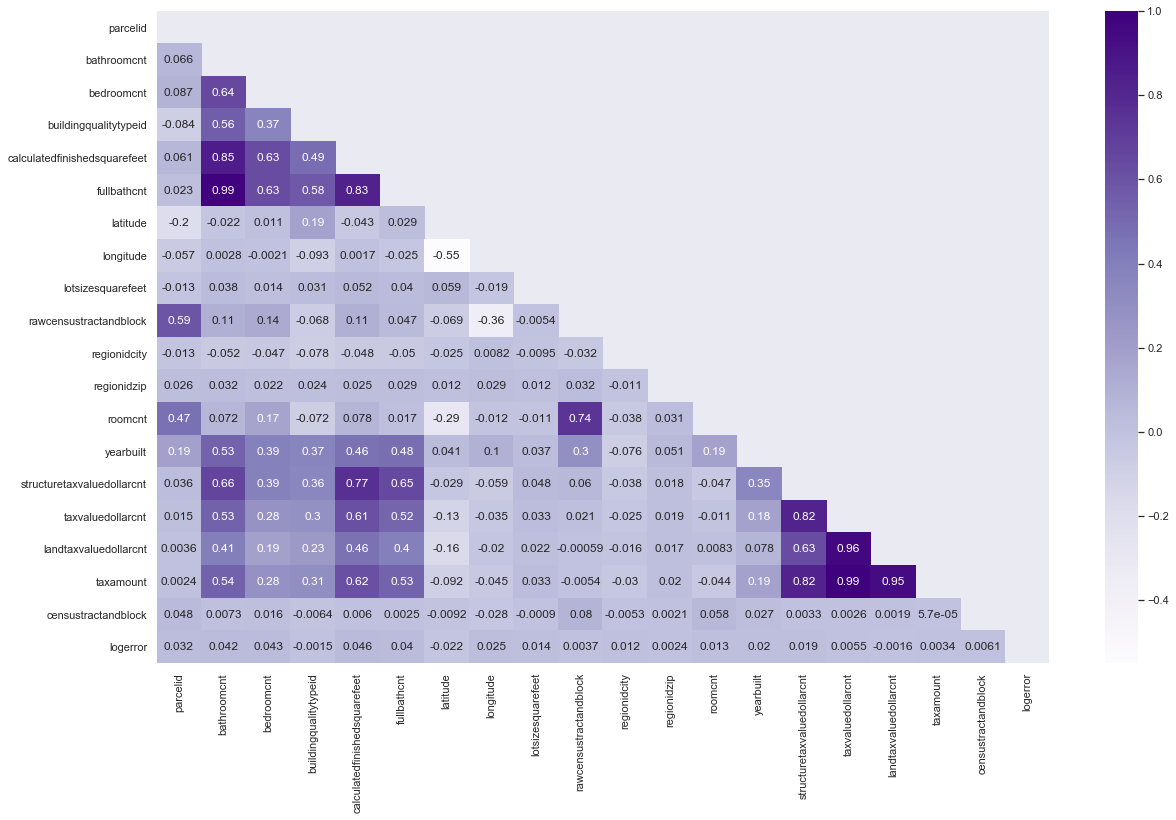

In [8]:
corr = train.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(20,12))
sns.heatmap(train.corr(), cmap='Purples', annot=True, mask=mask)
plt.show()

<div class="alert alert-block alert-info"><b>Takeaways:</b>

- Nothing stands out at having a very high corrrelation to logerror
    
- bathroom, bedroom and calculatedfinishedsquarefeet, regioncityid, lat&long and year built have highest correlation 
- any type of tax amount, building quality and lot size seems to have the lowest
</div>

In [9]:
alpha = .05

##### Continous vs. Categorical

*Are the logerror averages significantly different from each `county`?*

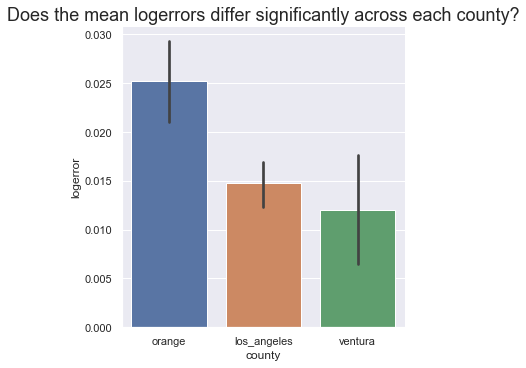

In [10]:
sns.catplot(x="county", y="logerror", kind="bar", data=train)
plt.title("Does the mean logerrors differ significantly across each county?", size = 18)
plt.show()

- $H_0$ = Average logerrors are the **same** across each county
- $H_a$ = Average logerrors are the **different** across each county

In [11]:
los_angeles = train[(train.county == 'los_angeles')].logerror
orange = train[(train.county == 'orange')].logerror
ventura = train[(train.county == 'ventura')].logerror

In [12]:
f, p = f_oneway(los_angeles, orange, ventura)

In [13]:
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")
p

We reject the null hypothesis


1.5427014352514877e-05

<div class="alert alert-block alert-info"><b>Conclusion:</b>

- The evidence supports with 95% confidence that the logerrors are <b>significantly different</b> from county to county.
    
- Orange county overall seems to have the highest logerror on average </div>

- Is there a relationship between `logerror` and `heatingsystemdesc`?

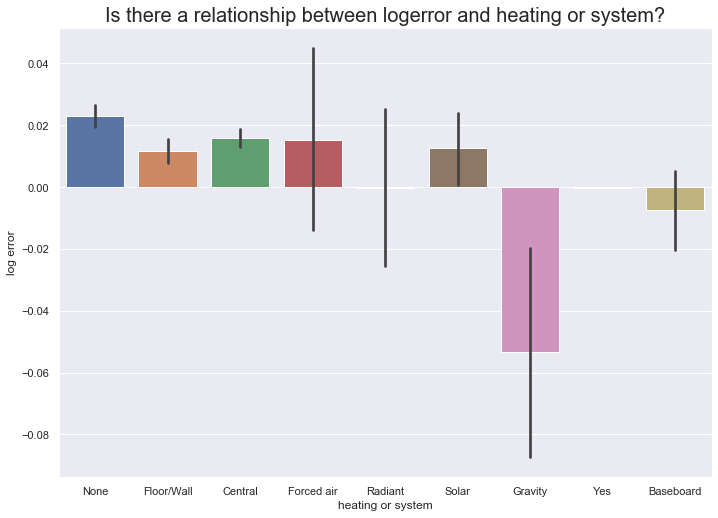

In [43]:
sns.barplot(x="heatingorsystemdesc", y="logerror", data=train)
plt.xlabel("heating or system")
plt.ylabel("log error")
plt.title("Is there a relationship between logerror and heating or system?", size = 20)
plt.show()

<div class="alert alert-block alert-info"><b>Conclusion:</b>

- Gravity has the highest disparity
    
- There does not seem to be one system that is better than the other
</div>

*Are the logerror averages significantly different from each `bedroomcnt`?*

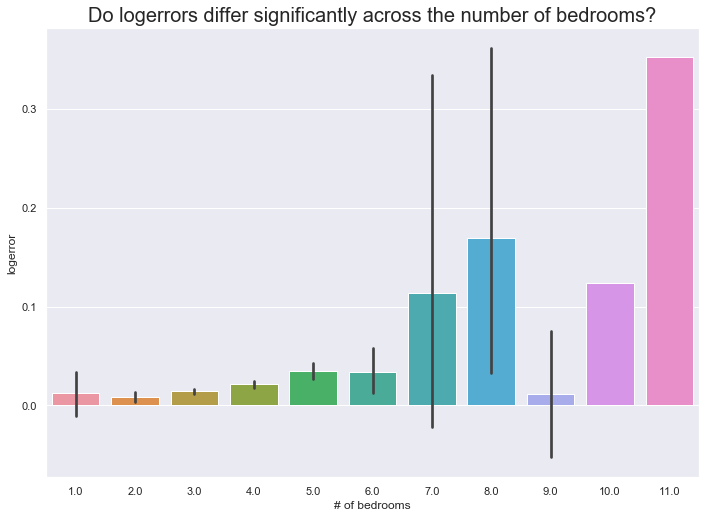

In [52]:
sns.barplot(x = 'bedroomcnt', y = 'logerror', data = train)
plt.title("Do logerrors differ significantly across the number of bedrooms?", size = 20)
plt.xlabel("# of bedrooms")
plt.show()

<div class="alert alert-block alert-info"><b>Conclusion:</b>

- There are higher amounts of error the more bedrooms there are
    
- What if we control for county? 
</div>

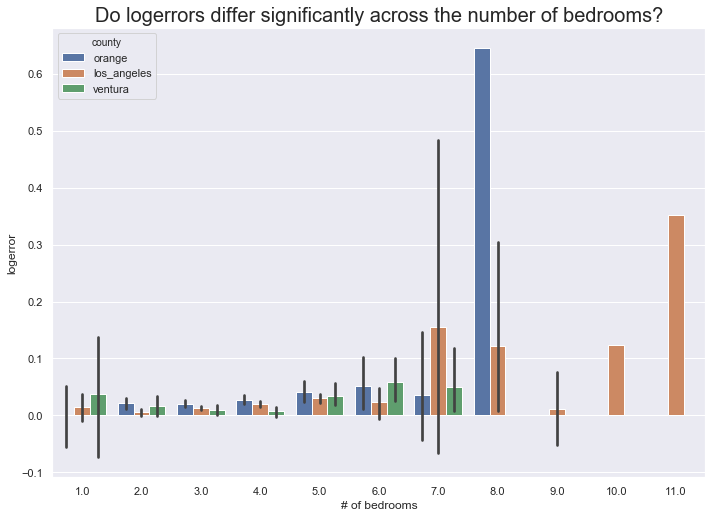

In [53]:
sns.barplot(x = 'bedroomcnt', y = 'logerror', data = train, hue = 'county')
plt.title("Do logerrors differ significantly across the number of bedrooms?", size = 20)
plt.xlabel("# of bedrooms")
plt.show()

<div class="alert alert-block alert-info"><b>Conclusion:</b>

- There are no bedrooms greater than 7 for ventura or for orange greater than 8
- not much disparity for los angeles county for bedrooms less than 4

</div>

*Are the logerror averages significantly different from each `bathroomcnt`?*

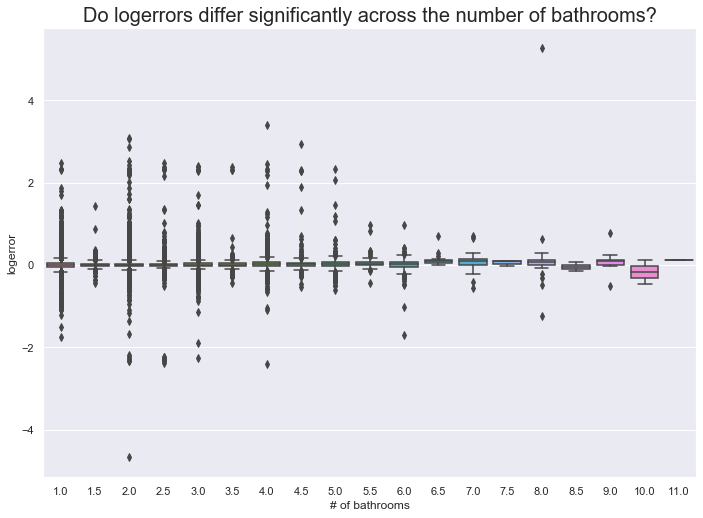

In [32]:
sns.boxplot(x = 'bathroomcnt', y = 'logerror', data = train)
plt.title("Do logerrors differ significantly across the number of bathrooms?", size = 20)
plt.xlabel("# of bathrooms")
plt.show()

<div class="alert alert-block alert-info"><b>Conclusion:</b>

- Many outliers for bathrooms less than 5
    
- means do not seem to have a large range from bathroom to bathroom </div>

*Is there a linear relationship between `logerror` and `buildingqualitytypeid`?*

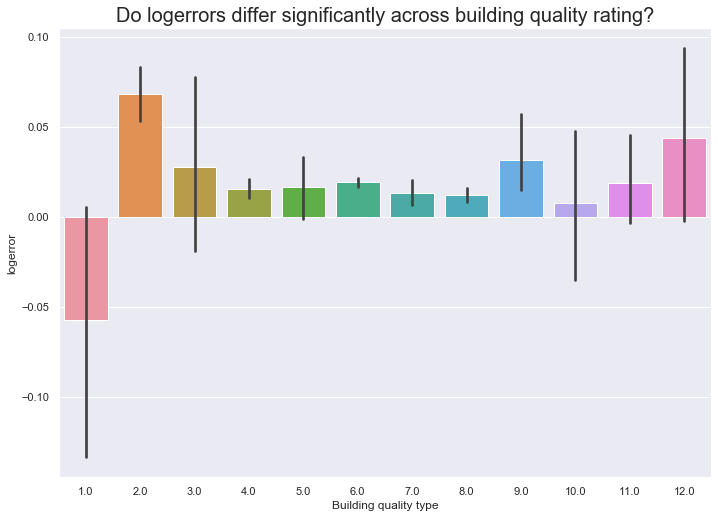

In [31]:
sns.barplot(x = 'buildingqualitytypeid', y = 'logerror', data = train)
plt.title("Do logerrors differ significantly across building quality rating?", size = 20)
plt.xlabel("Building quality type")
plt.show()

<div class="alert alert-block alert-info"><b>Conclusion:</b>

- building quality with a 1 were overvalued compared to the rest of the scaling
    
- greatest accuracy seems to be the middle of the pack quality
- overall they all seem to be overvalued
</div>

- $H_0$ = Average logerrors are the **same** across building quality type
- $H_a$ = Average logerrors are the **different** across building quality type

In [60]:
qual1 = train[(train.buildingqualitytypeid == 1)].logerror
qual2 = train[(train.buildingqualitytypeid == 2)].logerror
qual3 = train[(train.buildingqualitytypeid == 3)].logerror
qual4 = train[(train.buildingqualitytypeid == 4)].logerror
qual5 = train[(train.buildingqualitytypeid == 5)].logerror
qual6 = train[(train.buildingqualitytypeid == 6)].logerror
qual7 = train[(train.buildingqualitytypeid == 7)].logerror
qual8 = train[(train.buildingqualitytypeid == 8)].logerror
qual9 = train[(train.buildingqualitytypeid == 9)].logerror
qual10 = train[(train.buildingqualitytypeid == 10)].logerror
qual11 = train[(train.buildingqualitytypeid == 11)].logerror
qual12 = train[(train.buildingqualitytypeid == 12)].logerror

In [61]:
f, p = f_oneway(qual1, qual2, qual3, qual4, qual5, qual6, qual7, qual8, qual9, qual10, qual11, qual12)

In [62]:
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")
p

We fail to reject the null hypothesis


0.23624106794973054

<div class="alert alert-block alert-info"><b>Conclusion:</b>

- Test confirms that logerrors are the same across building quality type
</div>

Are the logerror averages significantly different from each `roomcnt`?

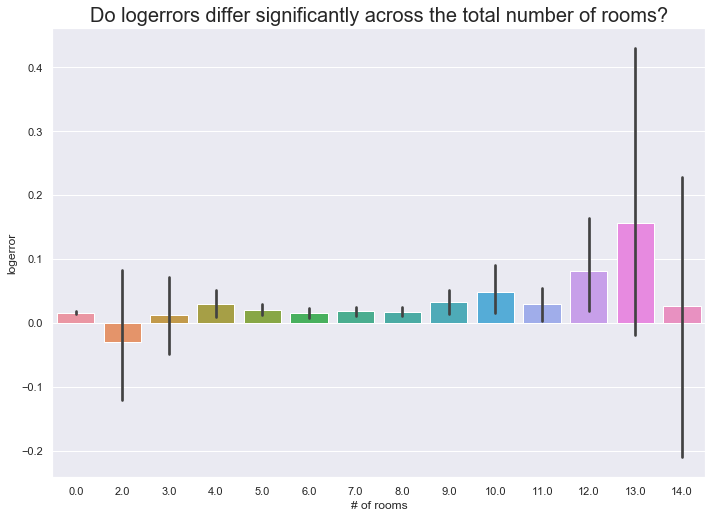

In [29]:
sns.barplot(x = 'roomcnt', y = 'logerror', data = train)
plt.title("Do logerrors differ significantly across the total number of rooms?", size = 20)
plt.xlabel("# of rooms")
plt.show()

<div class="alert alert-block alert-info"><b>Conclusion:</b>

- Seems to be the trean that the more rooms, the less accurate the prediction is
    
- 2 and 3 bedrooms do have many outliers outside the range </div>

##### Continuous vs. Continuous

*Is there a linear relationship between `logerror` and `structuretaxvaluedollarcnt`?*

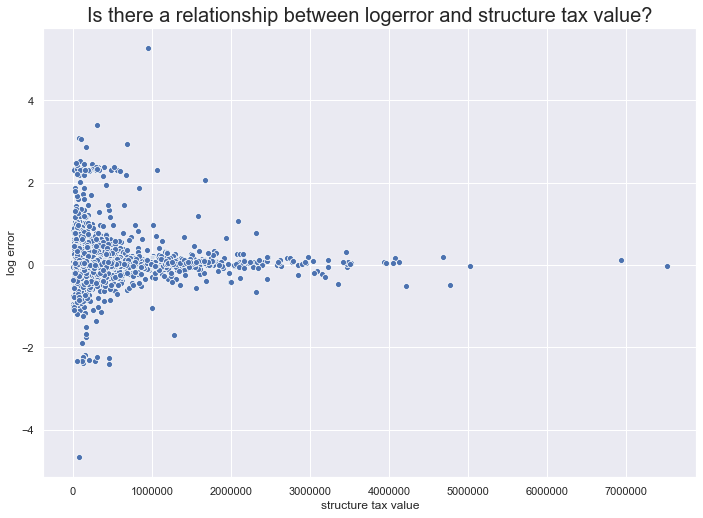

In [18]:
sns.scatterplot(x="structuretaxvaluedollarcnt", y="logerror", data=train)
plt.xlabel("structure tax value")
plt.ylabel("log error")
plt.title("Is there a relationship between logerror and structure tax value?", size = 20)
plt.show()

<div class="alert alert-block alert-info"><b>Conclusion:</b>

- May need to bin the data to get a better glimpse
    
- Lower structure tax value amount, the higher the disarity </div>

- Is there a relationship between `logerror` and `taxvaluedollarcnt`?

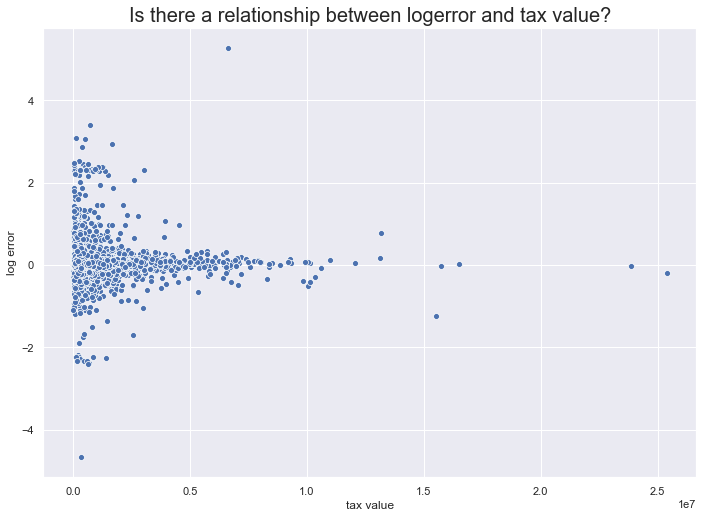

In [19]:
sns.scatterplot(x="taxvaluedollarcnt", y="logerror", data=train)
plt.xlabel("tax value")
plt.ylabel("log error")
plt.title("Is there a relationship between logerror and tax value?", size = 20)
plt.show()

<div class="alert alert-block alert-info"><b>Conclusion:</b>

- same as previous graph, may need to bin to get a better picture
- the lower the tax value, the greater the error
</div>

- Is there a relationship between `logerror` and `landtaxvaluedollarcnt`?

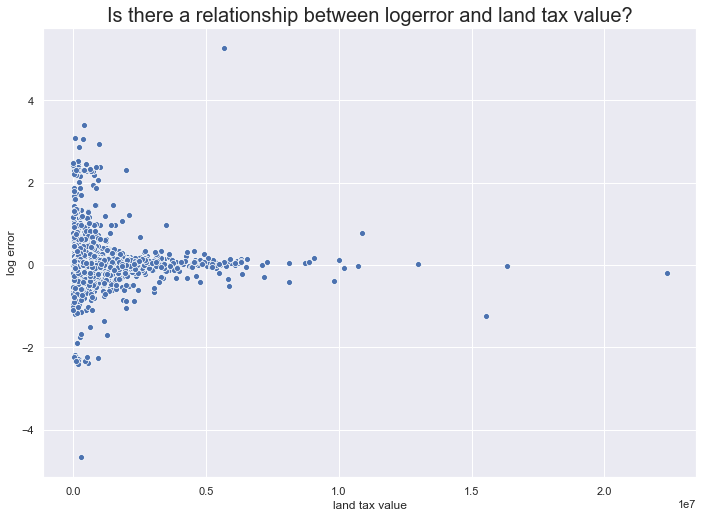

In [20]:
sns.scatterplot(x="landtaxvaluedollarcnt", y="logerror", data=train)
plt.xlabel("land tax value")
plt.ylabel("log error")
plt.title("Is there a relationship between logerror and land tax value?", size = 20)
plt.show()

<div class="alert alert-block alert-info"><b>Conclusion:</b>

- Starting to see a trend for errors and tax value
- what if we controlled by the county?</div>

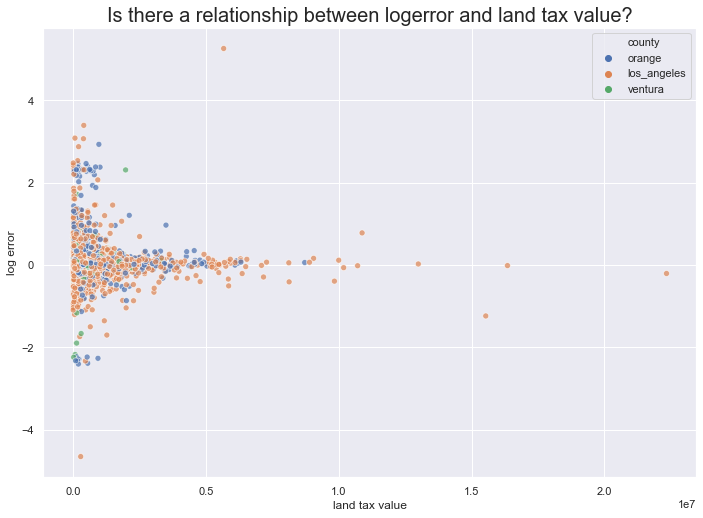

In [55]:
sns.scatterplot(x="landtaxvaluedollarcnt", y="logerror", data=train, hue = 'county', alpha = .7)
plt.xlabel("land tax value")
plt.ylabel("log error")
plt.title("Is there a relationship between logerror and land tax value?", size = 20)
plt.show()

<div class="alert alert-block alert-info"><b>Conclusion:</b>

- Makes no difference between counties
- There may not be enough data but ventura seems to have less outliers</div>

- Is there a relationship between `logerror` and `taxamount`?

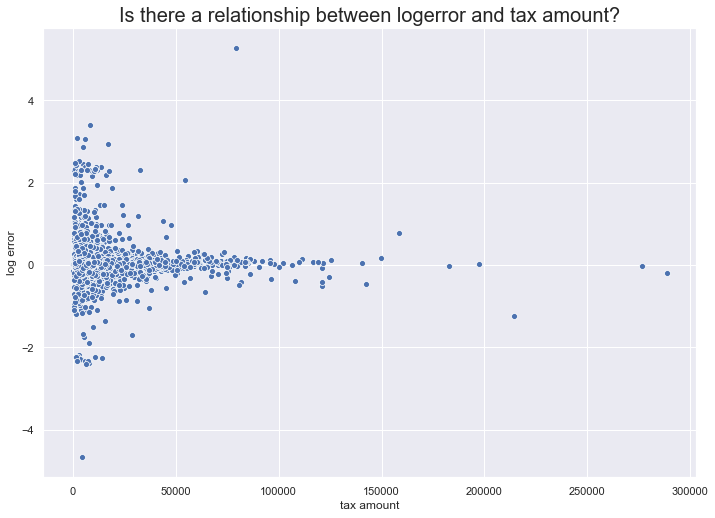

In [21]:
sns.scatterplot(x="taxamount", y="logerror", data=train)
plt.xlabel("tax amount")
plt.ylabel("log error")
plt.title("Is there a relationship between logerror and tax amount?", size = 20)
plt.show()

<div class="alert alert-block alert-info"><b>Conclusion:</b>

- same as above
- no matter how the tax is figured, the lower the taxes the greater the error</div>

- Is there a relationship between `logerror` and `calculatedfinishedsquarefeet`? 

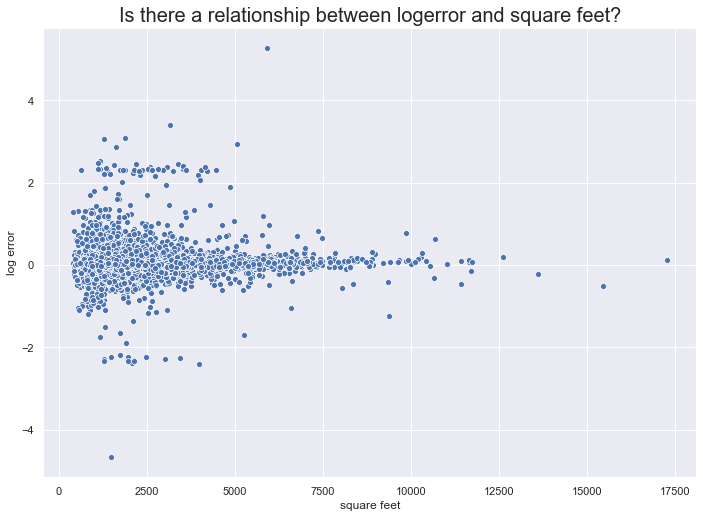

In [58]:
sns.scatterplot(x="calculatedfinishedsquarefeet", y="logerror", data=train)
plt.xlabel("square feet")
plt.ylabel("log error")
plt.title("Is there a relationship between logerror and square feet?", size = 20)
plt.show()

<div class="alert alert-block alert-info"><b>Conclusion:</b>

- Square feet mimicks the tax values chart.
- there is a weird shaped box again for houses less than 5000 sqrft
- lets look closer into the data</div>

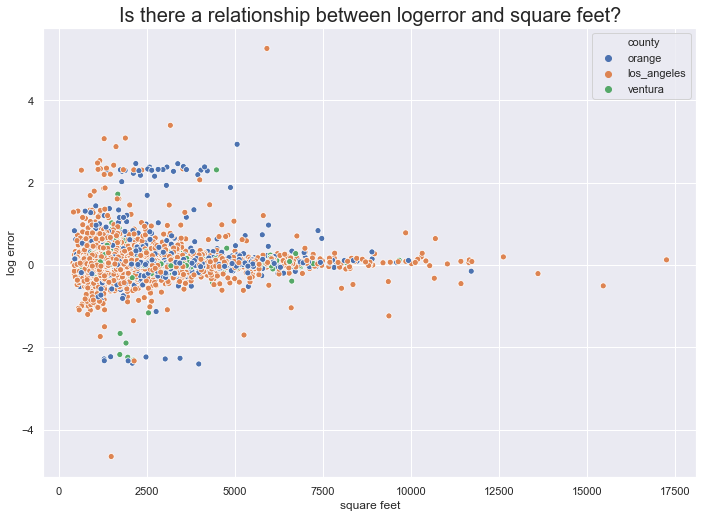

In [59]:
sns.scatterplot(x="calculatedfinishedsquarefeet", y="logerror", data=train, hue = 'county')
plt.xlabel("square feet")
plt.ylabel("log error")
plt.title("Is there a relationship between logerror and square feet?", size = 20)
plt.show()

<div class="alert alert-block alert-info"><b>Conclusion:</b>

- Orange county accounts for the box shape, more accurate on the errors</div>

- Is there a relationship between `logerror` and `lotsizesqurefeet`?

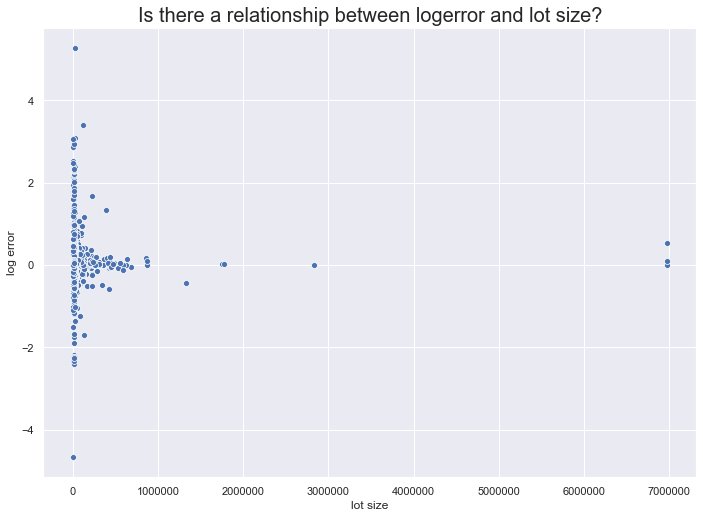

In [23]:
sns.scatterplot(x="lotsizesquarefeet", y="logerror", data=train)
plt.xlabel("lot size")
plt.ylabel("log error")
plt.title("Is there a relationship between logerror and lot size?", size = 20)
plt.show()

<div class="alert alert-block alert-info"><b>Conclusion:</b>

- Definitely need to bin at another time. most houses are small in lot size and it distracts from the whole picture </div>

- Is there a relationship between `logerror` and `yearbuilt`?

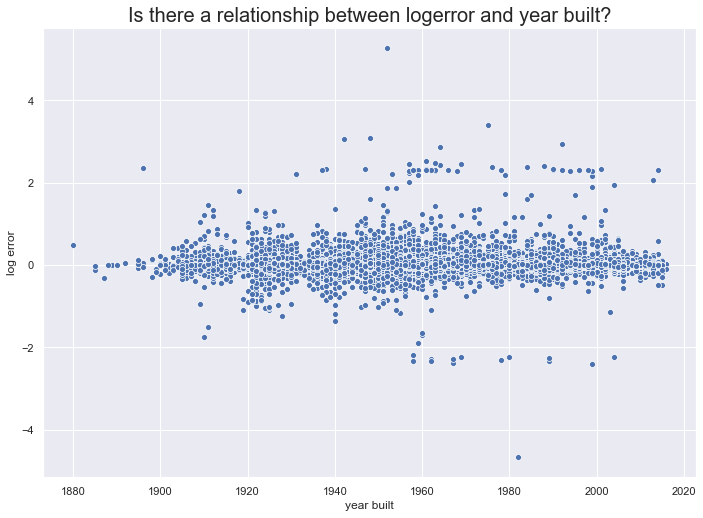

In [25]:
sns.scatterplot(x="yearbuilt", y="logerror", data=train)
plt.xlabel("year built")
plt.ylabel("log error")
plt.title("Is there a relationship between logerror and year built?", size = 20)
plt.show()

- $H_0$ = Logerrors and yearbuilt **do not** have a linear correlation
- $H_a$ = Logerrors and yearbuilt **do** have a linear correlation

In [33]:
corr, p = stats.pearsonr(train.yearbuilt, train.logerror)

In [45]:
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")
corr, p

We reject the null hypothesis


(0.019856844055335172, 0.0006918080549344511)

<div class="alert alert-block alert-info"><b>Conclusion:</b>

- The evidence supports with 95% confidence that the logerrors and year built <b>do have</b> a correlation.
    
- It's not a very strong positive correlation with a value of roughly .02
- What if we control by county?
</div>

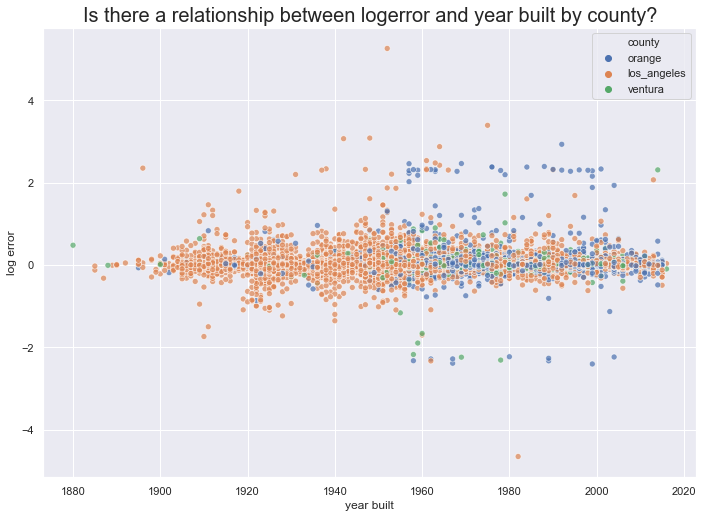

In [36]:
sns.scatterplot(x="yearbuilt", y="logerror", data=train, hue = 'county', alpha = .7)
plt.xlabel("year built")
plt.ylabel("log error")
plt.title("Is there a relationship between logerror and year built by county?", size = 20)
plt.show()

<div class="alert alert-block alert-info"><b>Conclusion:</b>

- Errors still seem to be consistent no matter the county
    
- There is a weird box from orange county from 1960-2000
</div>

### Bonus:

Compute the mean(logerror) by zipcode and the overall mean(logerror). Write a loop that will run a t-test between the overall mean and the mean for each zip code. We want to identify the zip codes where the error is significantly higher or lower than the expected error.